In [ ]:
!pip uninstall rpy2

Found existing installation: rpy2 3.5.1
Uninstalling rpy2-3.5.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/_rinterface_cffi_abi.py
    /usr/local/lib/python3.10/dist-packages/_rinterface_cffi_api.abi3.so
    /usr/local/lib/python3.10/dist-packages/rpy2-3.5.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/rpy2/*
Proceed (Y/n)? y
  Successfully uninstalled rpy2-3.5.1


In [ ]:
!pip install rpy2==3.5.1
!pip install dionysus
!pip install zarr
!pip install POT
!pip install gudhihttps://csusanbernardino-my.sharepoint.com/:o:/g/personal/000005511_csusb_edu/EifM_OKXM_xFg8h5q7O3JjsBgOM_3S_i4rU0oxumRPfNKg?e=VCXZDb
!pip install validclust
!pip install ipython-autotime

  Using cached rpy2-3.5.1-cp310-cp310-linux_x86_64.whl
ERROR: Invalid requirement: 'gudhihttps://csusanbernardino-my.sharepoint.com/:o:/g/personal/000005511_csusb_edu/EifM_OKXM_xFg8h5q7O3JjsBgOM_3S_i4rU0oxumRPfNKg?e=VCXZDb'
Hint: It looks like a path. File 'gudhihttps://csusanbernardino-my.sharepoint.com/:o:/g/personal/000005511_csusb_edu/EifM_OKXM_xFg8h5q7O3JjsBgOM_3S_i4rU0oxumRPfNKg?e=VCXZDb' does not exist.


In [ ]:
from google.colab import drive
from google.colab import files
import os

drive.mount('/content/drive',force_remount=True)
os.chdir("/content/drive/My Drive/NASA/")
!ls -ltr

Mounted at /content/drive
total 46446
-rw------- 1 root root 46916360 Jan 19  2023  OR_ABI-L1b-RadC-M6C01_G17_s20192191931196_e20192191933569_c20192191934019.7z
drwx------ 2 root root     4096 Jan 25  2023 'Sample Data'
drwx------ 2 root root     4096 Jan 25  2023  content
-rw------- 1 root root   323836 Jan 25  2023  MERRA2_t2m_GP_20210201-20210228.nc
drwx------ 2 root root     4096 Jan 29  2023  DATA
-rw------- 1 root root    78458 Mar  5  2023  pds.pdf
-rw------- 1 root root   169870 Mar  5  2023  pis.pdf
-rw------- 1 root root       56 Apr  6  2023  addnums.r
-rw------- 1 root root      618 Apr  7  2023  vector_ddalpha.r
drwx------ 2 root root     4096 Apr 12  2023  Tile_1_33
drwx------ 2 root root     4096 Apr 12  2023  Tile_1_33_s20192192041196.zarr
-rw------- 1 root root      283 Apr 12  2023  vector_ddalpha_11.R
-rw------- 1 root root     3407 Apr 24  2023  vector_ddalpha_1.R
drwx------ 2 root root     4096 May 22  2023  Labels
drwx------ 2 root root     4096 May 23  2023  Tile

In [ ]:
import zarr
import seaborn as sns
import numpy as np
import scipy
import pandas as pd
import dionysus as d
import matplotlib.pyplot as plt
import gudhi as gd
import time
import math
from gudhi.wasserstein import wasserstein_distance as wd
from gudhi.representations import Landscape
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, pairwise_distances
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from validclust import dunn, cop, ValidClust
from gudhi.wasserstein.barycenter import lagrangian_barycenter
import gudhi
import rpy2
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()
sns.set_theme()
%load_ext autotime

/usr/local/lib/python3.10/dist-packages/ot/backend.py:2998: UserWarning: To use TensorflowBackend, you need to activate the tensorflow numpy API. You can activate it by running: 
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()
  register_backend(TensorflowBackend())


time: 545 µs (started: 2023-12-18 15:14:19 +00:00)


In [ ]:
fname2 = 'Tile_1_33'

rawFileList = os.listdir(fname2)
print (rawFileList)

['Tile_1_33.csv', 'Tile_1_33_s20192192041196.zarr', 'Tile_1_33_s20192191956196.zarr', 'Tile_1_33_s20192181816196.zarr', 'Tile_1_33_s20192182036196.zarr', 'Tile_1_33_s20192191821196.zarr', 'Tile_1_33_s20192192006196.zarr', 'Tile_1_33_s20192191931196.zarr', 'Tile_1_33_s20192181926196.zarr', 'Tile_1_33_s20192182151196.zarr', 'Tile_1_33_s20192192026196.zarr', 'Tile_1_33_s20192200236197.zarr', 'Tile_1_33_s20192201931196.zarr', 'Tile_1_33_s20192210116197.zarr', 'Tile_1_33_s20192210121197.zarr', 'Tile_1_33_s20192200056197.zarr', 'Tile_1_33_s20192201851196.zarr', 'Tile_1_33_s20192210221197.zarr', 'Tile_1_33 (1).gsheet', 'Tile_1_33.gsheet', 'Tile_1_33']
time: 3.05 ms (started: 2023-12-18 15:14:52 +00:00)


In [ ]:
dfLabel = pd.read_csv(fname2 + '//' + rawFileList[0])
dfLabel['name'] = dfLabel.apply(lambda row: row.scene.split('_')[3], axis=1)
label = dfLabel.loc[dfLabel['name'] == 's20192210221197', 'fire'].iloc[0]
print (label)

0
time: 20.2 ms (started: 2023-12-18 15:14:54 +00:00)


In [ ]:
temp_series = rawFileList[1:]
timeSeriesName = temp_series[0:17]
print(timeSeriesName)

['Tile_1_33_s20192192041196.zarr', 'Tile_1_33_s20192191956196.zarr', 'Tile_1_33_s20192181816196.zarr', 'Tile_1_33_s20192182036196.zarr', 'Tile_1_33_s20192191821196.zarr', 'Tile_1_33_s20192192006196.zarr', 'Tile_1_33_s20192191931196.zarr', 'Tile_1_33_s20192181926196.zarr', 'Tile_1_33_s20192182151196.zarr', 'Tile_1_33_s20192192026196.zarr', 'Tile_1_33_s20192200236197.zarr', 'Tile_1_33_s20192201931196.zarr', 'Tile_1_33_s20192210116197.zarr', 'Tile_1_33_s20192210121197.zarr', 'Tile_1_33_s20192200056197.zarr', 'Tile_1_33_s20192201851196.zarr', 'Tile_1_33_s20192210221197.zarr']
time: 22 ms (started: 2023-12-18 15:14:56 +00:00)


In [ ]:
channel7List = []
channel7Name = []
for name in timeSeriesName:
    channelData = np.array(zarr.open(fname2 + '//' + name)[:, :, 6]) # select channel 7
    channel7List.append(channelData)
    channel7Name.append(name)
print(channel7List[0])
print (len(channel7List))

[[1.03710914 1.01520824 0.98079258 ... 1.00738645 0.98235685 0.91352546]
 [0.98235685 1.03398037 1.054317   ... 1.01833689 0.98861426 0.94324809]
 [0.98079258 1.03710914 1.05901003 ... 1.02772295 1.01207948 0.99800044]
 ...
 [1.50641441 1.45635521 1.43445432 ... 2.00544238 1.91940308 1.58932507]
 [1.40473163 1.40473163 1.39847422 ... 1.89906657 1.94912577 1.78643322]
 [1.45166218 1.46887004 1.42976117 ... 1.75045323 1.7520175  1.80520546]]
17
time: 166 ms (started: 2023-12-18 15:14:58 +00:00)


In [ ]:
fname2 = 'Tiles_2021_2022'
rawFileList = os.listdir(fname2)
print (rawFileList)
print (len(rawFileList))

['Tile_1_33_20201650001177.zarr', 'Tile_1_33_20203240001174.zarr', 'Tile_1_33_20201000001176.zarr', 'Tile_1_33_20201520001177.zarr', 'Tile_1_33_20200550001176.zarr', 'Tile_1_33_20200610001176.zarr', 'Tile_1_33_20203080001176.zarr', 'Tile_1_33_20201210001177.zarr', 'Tile_1_33_20202690001176.zarr', 'Tile_1_33_20203050001176.zarr', 'Tile_1_33_20213360001177.zarr', 'Tile_1_33_20202130001177.zarr', 'Tile_1_33_20213400001177.zarr', 'Tile_1_33_20210010001177.zarr', 'Tile_1_33_20200020001215.zarr', 'Tile_1_33_20200360001177.zarr', 'Tile_1_33_20202510001177.zarr', 'Tile_1_33_20201330001177.zarr', 'Tile_1_33_20202240001177.zarr', 'Tile_1_33_20200810001176.zarr', 'Tile_1_33_20213580001178.zarr', 'Tile_1_33_20201070001177.zarr', 'Tile_1_33_20203230021173.zarr', 'Tile_1_33_20201430001177.zarr', 'Tile_1_33_20200660001176.zarr', 'Tile_1_33_20213430001177.zarr', 'Tile_1_33_20202470001177.zarr', 'Tile_1_33_20203340001177.zarr', 'Tile_1_33_20201270001177.zarr', 'Tile_1_33_20213350001177.zarr', 'Tile_1_3

In [ ]:
#fname2 = 'Tiles'
csvName = 'Labels/Fire_Labels_2020-2021.csv'
#csvName2 = 'Fire_Labels_2020-2021.csv'
dfLabel = pd.read_csv(csvName)[['fname', 'fire']]
#dfLabel2 = pd.read_csv(csvName2)[['fname', 'fire']]

#rawFileList = dfLabel['fname'].tolist()
#fireDays = dfLabel.loc[dfLabel['fire'] == 1, 'fname'].tolist()
#print (fireDays)

#noFireDays = dfLabel.loc[dfLabel['fire'] == 0, 'fname'].tolist()

#print (len(fireDays) + len(noFireDays))

label = dfLabel.loc[dfLabel['fname'] == 'Tile_1_33_20203370001177.zarr', 'fire'].iloc[0]
print (label)

0
time: 1.2 s (started: 2023-12-18 15:15:31 +00:00)


In [17]:
channel7List = []
channel7Name = []
timeSeriesDict = {}

for name in rawFileList:
  if name.endswith(".zarr"):
    channelData = np.array(zarr.open(fname2 + '//' + name)[:, :, 0]) # select channel 7
    timeSeriesDict[name] = channelData
    channel7List.append(channelData)
    channel7Name.append(name)

print (len(channel7List))

425
time: 3.24 s (started: 2023-12-18 15:24:49 +00:00)


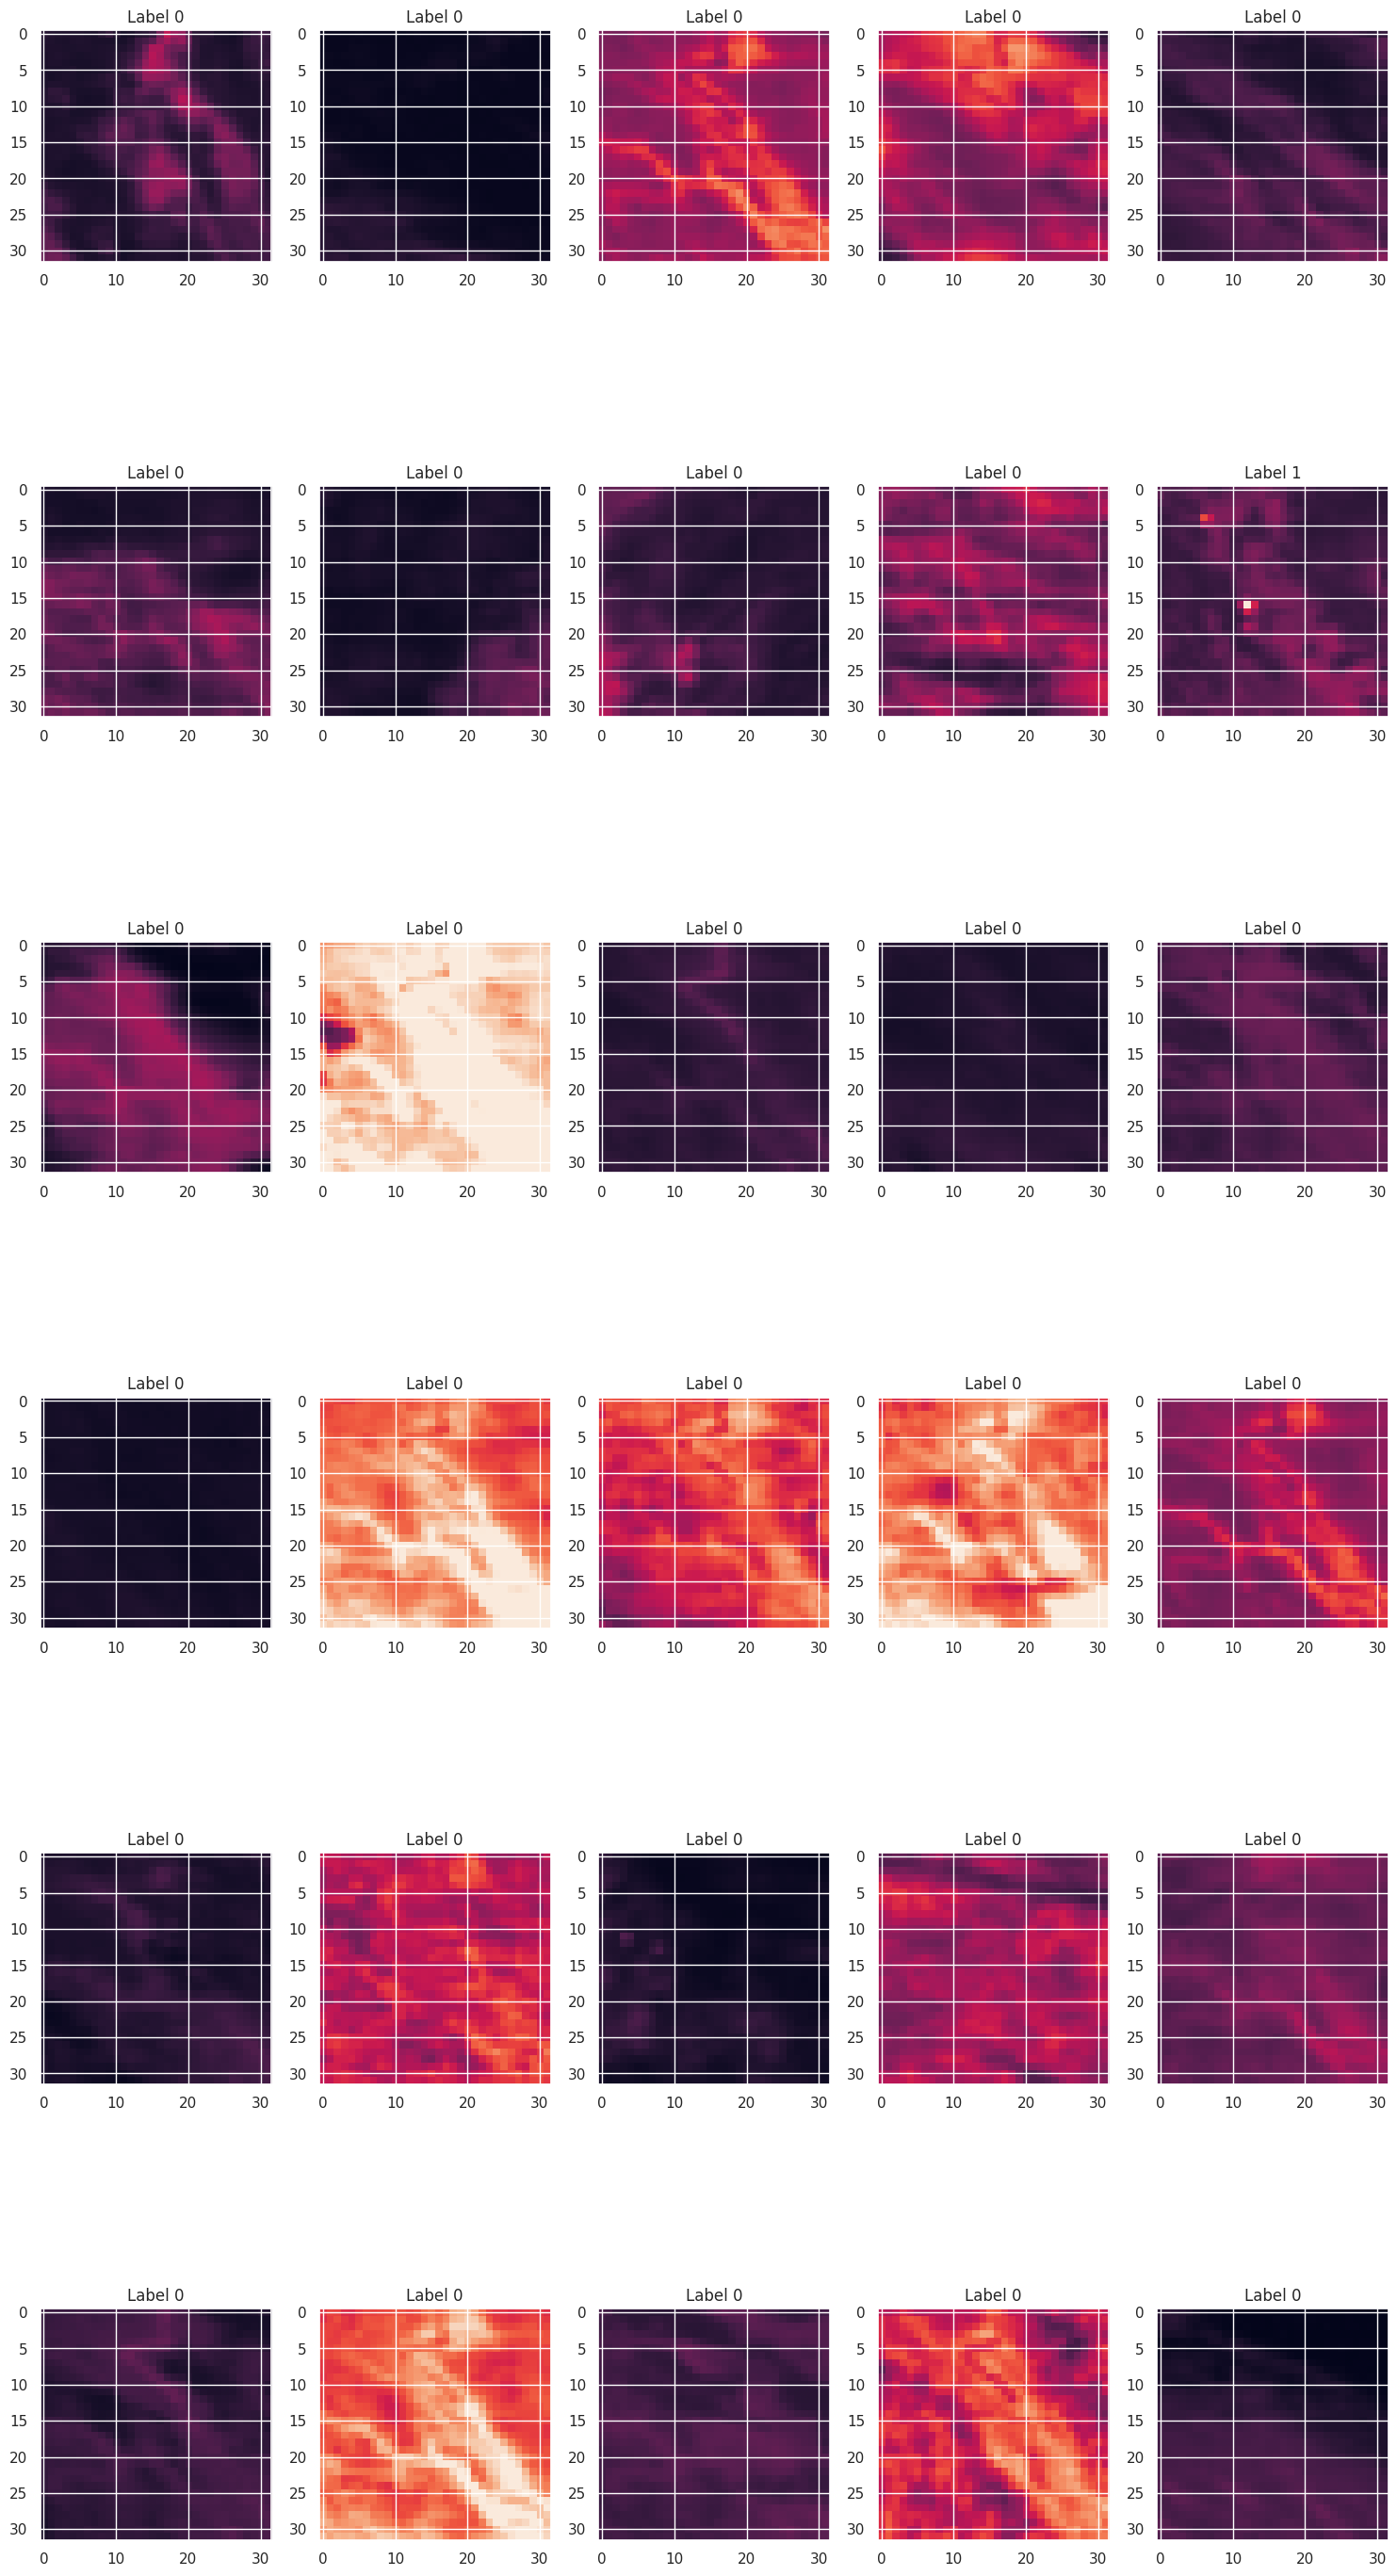

time: 14.8 s (started: 2023-12-18 15:27:47 +00:00)


In [19]:
# plot channel 7 timeseries
fig, axs = plt.subplots(6, 5, figsize=(15, 30))

for i in range(6):
    for j in range(5):
        axs[i, j].imshow(channel7List[i* 5 + j], vmin=0, vmax=1) # vmin, vmax may change on different tiles
        label = dfLabel.loc[dfLabel['fname'] == channel7Name[i* 5 + j], 'fire'].iloc[0]
        axs[i, j].title.set_text('Label {}'.format(label))

plt.tight_layout()

In [20]:
def extract_PD_arrays_with_freudenthal_triangulation(data, lower_bound = 0, upper_bound = 8): #change upper bound!!!!!!!!!!

    f_lower_star = d.fill_freudenthal(np.array(data, dtype='float64'))
    p = d.homology_persistence(f_lower_star)
    dgms = d.init_diagrams(p, f_lower_star)
    birth0=np.array([dgm.birth for dgm in dgms[0]])
    death0=np.array([dgm.death for dgm in dgms[0]])
    death0[death0==np.Infinity] = upper_bound
    birth1=np.array([dgm.birth for dgm in dgms[1]])
    death1=np.array([dgm.death for dgm in dgms[1]])
    death1[death1==np.Infinity] = upper_bound

    return [[birth0,death0],[birth1,death1]]

time: 3.63 ms (started: 2023-12-18 15:30:14 +00:00)


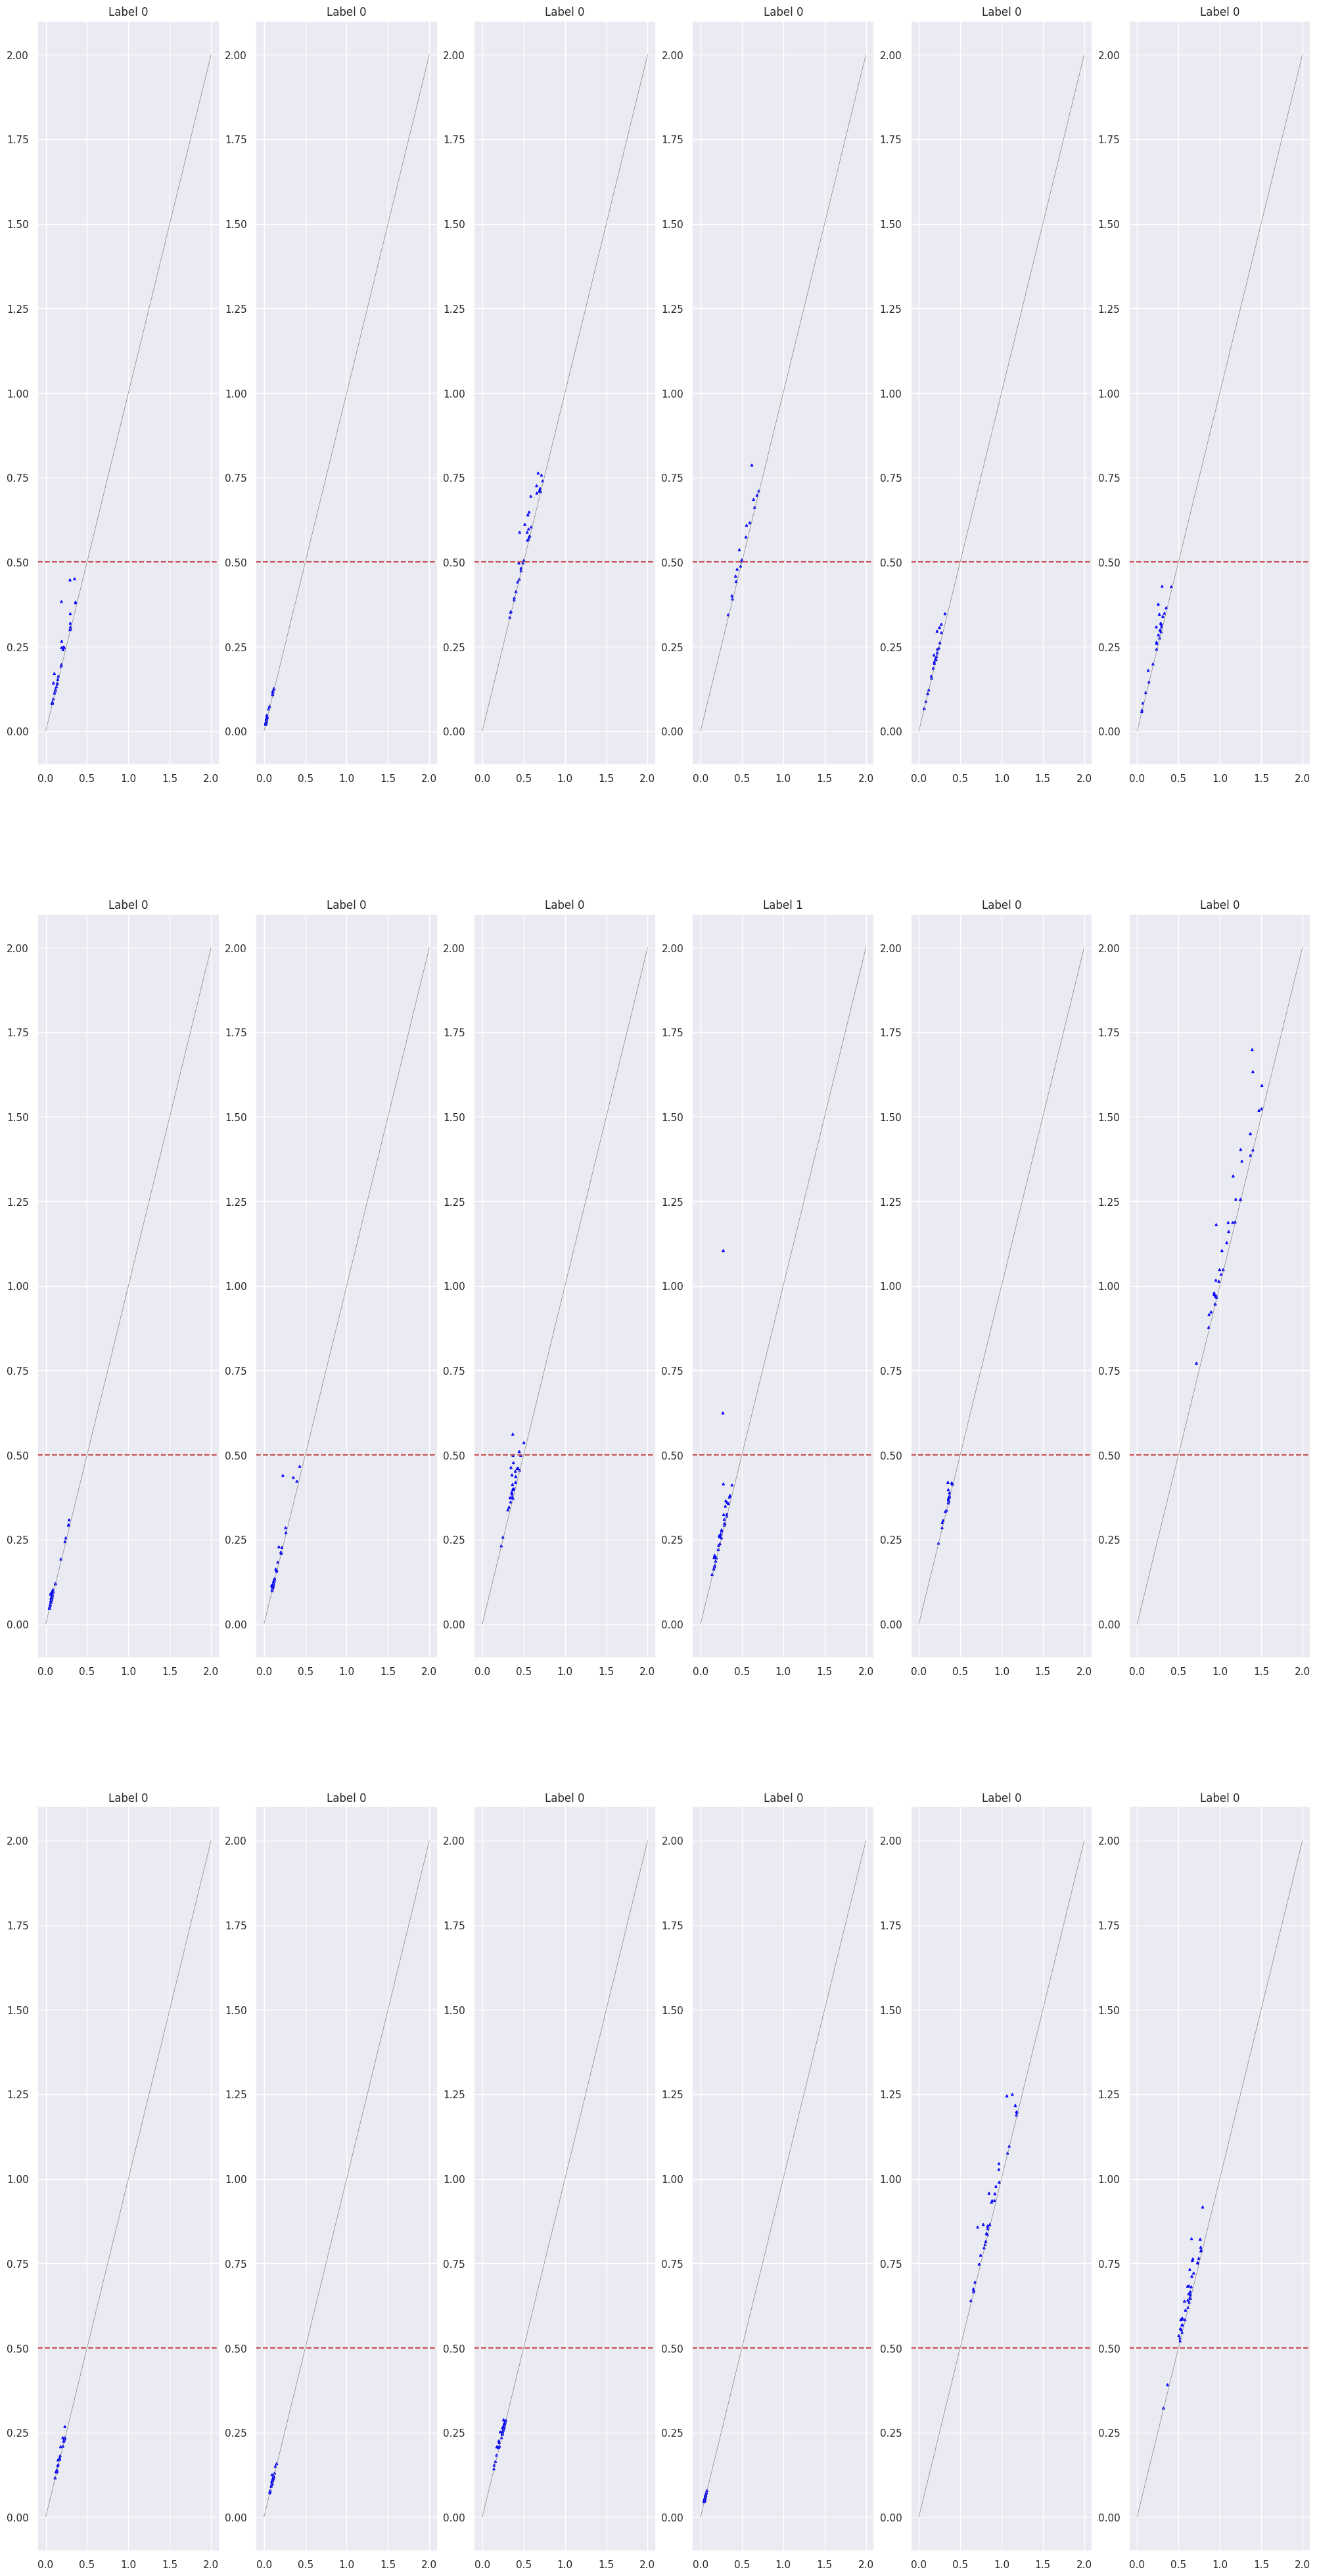

time: 9.47 s (started: 2023-12-18 15:48:09 +00:00)


In [35]:
fig, axs = plt.subplots(3, 6, figsize=(25, 50))

pd0_union = []
pd1_union = []
groundTruth = []
for i in range(3):
    for j in range(6):
        lower_bound = 0
        upper_bound = 3

        p0, p1 = extract_PD_arrays_with_freudenthal_triangulation(channel7List[i* 6 + j], lower_bound = lower_bound, upper_bound = upper_bound)
        pd0_union.append(p0)
        pd1_union.append(p1)
        #axs[i, j].scatter(birth0, death0, color='r', s=5, label = 'Dimension 0')
        axs[i, j].scatter(p1[0], p1[1], marker='^', s=5, facecolors='none', edgecolor='blue', label = 'Dimension 1')
        #axs[i, j].scatter(p0[0], p0[1], marker='^', s=5, facecolors='none', edgecolor='red', label = 'Dimension 0')
        axs[i, j].plot(np.arange(lower_bound, upper_bound), np.arange(lower_bound, upper_bound), '-', color='grey', lw=0.5)
        #axs[i, j].plot(np.arange(lower_bound, upper_bound), 2, '-', color='grey', lw=0.5)
        axs[i, j].axhline(y = 0.5, color='r', linestyle='--')

        label = dfLabel.loc[dfLabel['fname'] == channel7Name[i* 6 + j], 'fire'].iloc[0]
        groundTruth.append(label)
        axs[i, j].title.set_text('Label {}'.format(label))
        #axs[i, j].set_xlabel('Birth')
        #axs[i, j].set_ylabel('Death')

#plt.tight_layout()
#plt.show()

In [36]:
def optimalDBSCAN(data, score_, eps, metric='euclidean', bMax=True, distType=0):
    eps_range=np.arange(eps['min'],eps['max'],eps['inc'])
    min_samples_range=range(2,10)
    if bMax==True:
        best_score =-1e9
    else:
        best_score =1e9

    eps_ask=0
    min_samples_ask=0
    clustering_ask=None
    print("score, best_score, eps, eps_ask, min_samples, min_samples_ask")
    for min_samples in min_samples_range:
     for eps in eps_range:
      clustering = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
      clustering.fit(data)
      if len(np.unique(clustering.labels_))>1:
        if distType==0:
            score=score_(data, clustering.labels_)
        elif distType==1:
            dist=pairwise_distances(data)
            score=score_(dist, clustering.labels_)
        elif distType==2:
            dist=pairwise_distances(data)
            score=score_(data, dist, clustering.labels_)
        if (score>best_score and bMax==True):
          best_score=score
          eps_ask=eps
          min_samples_ask=min_samples
          clustering_ask=clustering
        elif(score<best_score and bMax==False):
          best_score=score
          eps_ask=eps
          min_samples_ask=min_samples
          clustering_ask=clustering
        print(score, best_score, eps, eps_ask, min_samples, min_samples_ask)
    return(best_score, eps_ask, min_samples_ask, clustering_ask)

def optimalHClust(data, score_, metric='euclidean', bMax=True, distType=0):
    if bMax==True:
        best_score =-1e9
    else:
        best_score =1e9
    linkage_ask = ''
    n_ask = 2
    clustering_ask = None
    print("score, best_score, i, n_ask, linkage, linkage_ask")
    for i in range(2, 7):
        for linkage in ['complete', 'average', 'single']:
            clustering= AgglomerativeClustering(n_clusters=i, affinity=metric, linkage=linkage)
            #clustering = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
            clustering.fit(data)
            if len(np.unique(clustering.labels_))>1:
                if distType==0:
                    score=score_(data, clustering.labels_)
                elif distType==1:
                    dist=pairwise_distances(data)
                    score=score_(dist, clustering.labels_)
                elif distType==2:
                    dist=pairwise_distances(data)
                    score=score_(data, dist, clustering.labels_)
                if (score>best_score and bMax==True):
                    best_score=score
                    linkage_ask=linkage
                    n_ask=i
                    clustering_ask=clustering
                elif(score<best_score and bMax==False):
                    best_score=score
                    linkage_ask=linkage
                    n_ask=i
                    clustering_ask=clustering
                print(score, best_score, i, n_ask, linkage, linkage_ask)
    return(best_score, n_ask, linkage_ask, clustering_ask)

time: 3.89 ms (started: 2023-12-18 15:48:18 +00:00)


In [37]:
def PD2Silhoutte(PDList, resolution = 100):
    SH = gd.representations.Silhouette(resolution=resolution, weight=lambda x: np.power(x[1]-x[0],1))
    SilList = []
    for i in range(len(PDList)):
        sh = SH.fit_transform([PDList[i]])[0]
        SilList.append(sh)
    return SilList

time: 967 µs (started: 2023-12-18 15:48:18 +00:00)


In [38]:
PDList = []
for i in pd1_union:
    temp = np.vstack((i[0], i[1])).T
    PDList.append(temp)

time: 955 µs (started: 2023-12-18 15:48:18 +00:00)


DDALPHA

In [41]:
os.chdir("/content/drive/My Drive/NASA")
!ls -ltr

total 46446
-rw-------   1 root root 46916360 Jan 19  2023  OR_ABI-L1b-RadC-M6C01_G17_s20192191931196_e20192191933569_c20192191934019.7z
drwx------   2 root root     4096 Jan 25  2023 'Sample Data'
drwx------   2 root root     4096 Jan 25  2023  content
-rw-------   1 root root   323836 Jan 25  2023  MERRA2_t2m_GP_20210201-20210228.nc
drwx------   2 root root     4096 Jan 29  2023  DATA
-rw-------   1 root root    78458 Mar  5  2023  pds.pdf
-rw-------   1 root root   169870 Mar  5  2023  pis.pdf
-rw-------   1 root root       56 Apr  6  2023  addnums.r
-rw-------   1 root root      618 Apr  7  2023  vector_ddalpha.r
drwx------  20 root root     4096 Apr 12  2023  Tile_1_33
drwx------   2 root root     4096 Apr 12  2023  Tile_1_33_s20192192041196.zarr
-rw-------   1 root root      283 Apr 12  2023  vector_ddalpha_11.R
-rw-------   1 root root     3407 Apr 24  2023  vector_ddalpha_1.R
drwx------   2 root root     4096 May 22  2023  Labels
drwx------   2 root root     4096 May 23  2023  

In [42]:
r = robjects.r
r['source']('ddalpha(1).R')

(as ‘lib’ is unspecified)
































































	‘/tmp/RtmpLQ95sJ/downloaded_packages’








value,[RTYPES.CLOSXP]
visible,[RTYPES.LGLSXP]


time: 5min 24s (started: 2023-12-18 15:49:05 +00:00)


In [43]:
simplicial_volume = robjects.globalenv['simplicial_volume_list']
convex_hull_peeling = robjects.globalenv['convex_hull_peeling_list']
zoinoid = robjects.globalenv['zonoid_depth_list']
spatial = robjects.globalenv['spatial_depth_list']
mahalanobis = robjects.globalenv['mahalanobis_depth_list']
halfspace = robjects.globalenv['halfspace_depth_list']
halfspace_exact = robjects.globalenv['halfspace__exact_depth_list']
projection = robjects.globalenv['projection_depth_list']
simplicial = robjects.globalenv['simplicial_depth_list']
SilList = PD2Silhoutte(PDList)

time: 13.6 ms (started: 2023-12-18 15:54:48 +00:00)


In [48]:
# Vectorize the PDs then do cluster
# Vectorize by Silhoutte
#SilList = PD2Silhoutte(PDList, resolution=10)
#Pass silList to R
m = robjects.r['matrix'](SilList, nrow=len(SilList), ncol=10) #specify number of columns and rows

time: 21.8 ms (started: 2023-12-18 15:58:06 +00:00)


In [53]:
# Simplicial Volume
temp_list = simplicial_volume(m, len(SilList), 10)
list_r = []
for i in temp_list:
  list_r.append(i[0])
simplexVolDepthList = list_r
#fig, axs = plt.subplots(3, 6, figsize=(21, 15))
#for i in range(3):
   # for j in range(6):
       # if i* 6 + j <= 16:
           # axs[i, j].plot(SilList[i*6 + j])
           # axs[i, j].set_ylim(0, 1)
            #axs[i, j].title.set_text('Label {}, Data Depth {:.3f}'.format(groundTruth[i*6 + j], simplexVolDepthList[i*6 + j]))

#plt.tight_layout()
#plt.show()

time: 21.9 ms (started: 2023-12-18 16:00:40 +00:00)


In [ ]:
#Halfspace (exact)
temp_list = halfspace_exact(m, len(SilList), 10)
list_r = []
for i in temp_list:
  list_r.append(i[0])
HalfspaceDepthList = list_r
fig, axs = plt.subplots(3, 6, figsize=(15, 30))
for i in range(3):
    for j in range(6):
        if i* 6 + j <= 16:
            axs[i, j].plot(SilList[i*6 + j])
            axs[i, j].set_ylim(0, 1)
            axs[i, j].title.set_text('Label {}, Data Depth {:.3f}'.format(groundTruth[i*6+ j], HalfspaceDepthList[i*6 + j]))

plt.tight_layout()
plt.show()

In [ ]:
plt.clf()
# Convex Hull Peeling
temp_list = convex_hull_peeling(m, len(SilList), 10)
list_r = []
for i in temp_list:
  list_r.append(i[0])
CHPDepthList = list_r
fig, axs = plt.subplots(4, 6, figsize=(21, 15))
for i in range(4):
    for j in range(6):
        if i* 6 + j <= 24:
            axs[i, j].plot(SilList[i*6 + j])
            axs[i, j].set_ylim(0, 1)
            axs[i, j].title.set_text('Label {}, Data Depth {:.3f}'.format(groundTruth[i*6 + j], CHPDepthList[i*6 + j]))

plt.tight_layout()
plt.show()

In [ ]:
#Zoinoid
temp_list = zoinoid(m, len(SilList), 10)
list_r = []
for i in temp_list:
  list_r.append(i[0])
ZoinoidDepthList = list_r
fig, axs = plt.subplots(85, 5, figsize=(21, 15))
for i in range(85):
    for j in range(5):
        if i* 6 + j <= 425:
            axs[i, j].plot(SilList[i*6 + j])
            axs[i, j].set_ylim(0, 1)
            axs[i, j].title.set_text('Label {}, Data Depth {:.3f}'.format(groundTruth[i*6 + j], ZoinoidDepthList[i*6 + j]))

plt.tight_layout()
plt.show()

In [ ]:
#Spatial
temp_list = spatial(m, len(SilList), 10)
list_r = []
for i in temp_list:
  list_r.append(i[0])
SpatialDepthList = list_r
fig, axs = plt.subplots(4, 6, figsize=(21, 15))
for i in range(4):
    for j in range(6):
        if i* 6 + j <= 24:
            axs[i, j].plot(SilList[i*6 + j])
            axs[i, j].set_ylim(0, 1)
            axs[i, j].title.set_text('Label {}, Data Depth {:.3f}'.format(groundTruth[i*6 + j], SpatialDepthList[i*6 + j]))

plt.tight_layout()
plt.show()

In [ ]:
#Mahalanobis
temp_list = mahalanobis(m, len(SilList), 10)
list_r = []
for i in temp_list:
  list_r.append(i[0])
MahalanobisDepthList = list_r
fig, axs = plt.subplots(4, 6, figsize=(21, 15))
for i in range(4):
    for j in range(6):
        if i* 6 + j <= 24:
            axs[i, j].plot(SilList[i*6 + j])
            axs[i, j].set_ylim(0, 1)
            axs[i, j].title.set_text('Label {}, Data Depth {:.3f}'.format(groundTruth[i*6+ j], MahalanobisDepthList[i*6 + j]))


plt.tight_layout()
plt.show()

In [ ]:
u_param = 6
#Halfspace
temp_list = halfspace(m, len(SilList), 10)
list_r = []
for i in temp_list:
  list_r.append(i[0])
HalfspaceDepthList = list_r
fig, axs = plt.subplots(3, 6, figsize=(15, 30))
for i in range(3):
    for j in range(6):
        if i* u_param + j <= 16:
            axs[i, j].plot(SilList[i*u_param + j])
            axs[i, j].set_ylim(0, 1)
            axs[i, j].title.set_text('Label {}, Data Depth {:.3f}'.format(groundTruth[i*u_param + j], HalfspaceDepthList[i*u_param + j]))

plt.tight_layout()
#plt.show()

In [ ]:
#Halfspace (exact)
temp_list = halfspace_exact(m, len(SilList), 10)
list_r = []
for i in temp_list:
  list_r.append(i[0])
HalfspaceDepthList = list_r
fig, axs = plt.subplots(3, 6, figsize=(15, 30))
for i in range(3):
    for j in range(6):
        if i* 6 + j <= 16:
            axs[i, j].plot(SilList[i*6 + j])
            axs[i, j].set_ylim(0, 1)
            axs[i, j].title.set_text('Label {}, Data Depth {:.3f}'.format(groundTruth[i*6+ j], HalfspaceDepthList[i*6 + j]))

plt.tight_layout()
#plt.show()

In [ ]:
#Projection
temp_list = projection(m, len(SilList), 10)
list_r = []
for i in temp_list:
  list_r.append(i[0])
ProjectionDepthList = list_r
fig, axs = plt.subplots(4, 6, figsize=(21, 15))
for i in range(4):
    for j in range(6):
        if i* 6+ j <= 24:
            axs[i, j].plot(SilList[i*6 + j])
            axs[i, j].set_ylim(0, 1)
            axs[i, j].title.set_text('Label {}, Data Depth {:.3f}'.format(groundTruth[i*6 + j], ProjectionDepthList[i*6 + j]))

plt.tight_layout()
plt.show()

In [ ]:
#Simplicial
temp_list = simplicial(m, len(SilList), 10)
list_r = []
for i in temp_list:
  list_r.append(i[0])
SimplicialDepthList = list_r
fig, axs = plt.subplots(4, 6, figsize=(21, 15))
for i in range(4):
    for j in range(6):
        if i* 6 + j <= 24:
            axs[i, j].plot(SilList[i*6 + j])
            axs[i, j].set_ylim(0, 1)
            axs[i, j].title.set_text('Label {}, Data Depth {:.3f}'.format(groundTruth[i*6 + j], SimplicialDepthList[i*6 + j]))

plt.tight_layout()
plt.show()

DDAlpha Time Plot

In [ ]:
  simplicial_volume = robjects.globalenv['simplicial_volume_list']
  convex_hull_peeling = robjects.globalenv['convex_hull_peeling_list']
  zoinoid = robjects.globalenv['zonoid_depth_list']
  spatial = robjects.globalenv['spatial_depth_list']
  mahalanobis = robjects.globalenv['mahalanobis_depth_list']
  halfspace = robjects.globalenv['halfspace_depth_list']
  projection = robjects.globalenv['projection_depth_list']
  simplicial = robjects.globalenv['simplicial_depth_list']
  SilList = PD2Silhoutte(PDList, resolution=10)

time: 360 ms (started: 2023-08-07 16:17:47 +00:00)


In [ ]:
#Generate Data
S = []
for i in range(200): #number of data points
   S.append(np.random.uniform(size = 5, low = 0, high = 10))

In [ ]:
m = robjects.r['matrix'](S, nrow=len(S), ncol=10)

In [ ]:
simplicial_volume(m, len(S), 10) #data points #data dimension  #ddalpha function

In [ ]:
halfspace(m, len(S), 10) #data points #data dimension  #ddalpha function

In [ ]:
e_x = [50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
e_y= [0.166, 0.695, 1.59, 4.44, 6.22, 8.97, 14.00, 19.5, 25.00, 31.1, 39.1]
sv_x = [50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
sv_y = [0.0417, 0.117, 0.0557, 0.259, 0.279, 0.528, 1.75, 1.78, 1.95, 2.64, 4.04]
hs_x = [50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
hs_y = [0.0255, 0.241, 0.0386, 0.691, 0.0659, 0.161, 0.187, 0.183, 0.211, 0.269, 0.503]

time: 865 µs (started: 2023-11-04 18:02:33 +00:00)


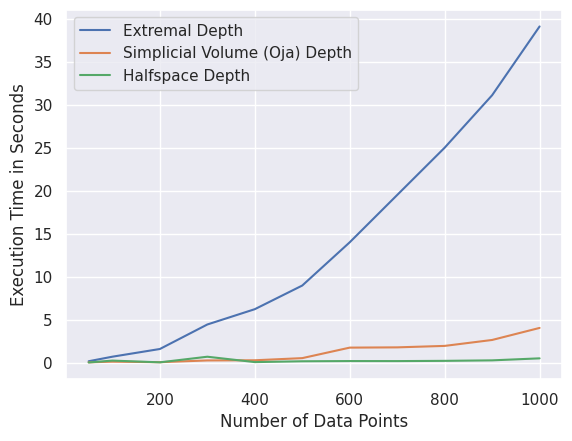

time: 428 ms (started: 2023-11-04 18:02:36 +00:00)


In [ ]:
plt.plot(e_x,e_y)
plt.plot(sv_x,sv_y)
plt.plot(hs_x,hs_y)
plt.legend(['Extremal Depth','Simplicial Volume (Oja) Depth', 'Halfspace Depth'])
plt.xlabel("Number of Data Points")
plt.ylabel("Execution Time in Seconds")
#plt.yscale("log")
plt.show()